# Full Sound Check

In [ ]:
import torchaudio.functional as F
import torchaudio
import torch
import librosa
import glob
from pathlib import Path
import matplotlib.pyplot as plt
from collections.abc import Iterable
import numpy as np
import re

: 

In [5]:
class Uility():
    @classmethod
    def get_list_to_matrix_position(cls):
        return 0

    @classmethod
    def get_list_to_matrix_size(cls):
        return 0

In [6]:
mel_converter = torchaudio.transforms.MelSpectrogram(n_mels=80)
db_converter = torchaudio.transforms.AmplitudeToDB()

In [7]:
class SoundClass(Uility):
    @classmethod
    def getSound(cls, path):
        try:
            waveform, sample_rate = torchaudio.load(Path(path).with_suffix('.wav'))
            audio_sample = F.resample(waveform[0], sample_rate, 16000, lowpass_filter_width=6)
            feature = db_converter(mel_converter(audio_sample))
        except Exception as e:
            feature = None
            audio_sample = None
            print(e)
        return audio_sample, feature

In [8]:
def extract_number(filename):
    match = re.search(r'_out_(\d{1,2})', filename)
    if match:
        return int(match.group()[5:])
    return None

def sort_filenames_by_number(filenames):
    return sorted(filenames, key=extract_number)

In [9]:
class ObjectHelper():
    @classmethod
    def is_NestedIterable(cls, target):
        if cls.isIterable(target) and all(cls.isIterable(target) for sublist in target):
            return True
        else:
            return False

    @classmethod
    def isIterable(self, target):
        return True if isinstance(target, Iterable) else False

In [10]:
class PlotManager():
    def __init__(self, row=1, col=1, size=[7,3], type="melspectrogram"):
        self.row = row
        self.col = col
        self.figure = None
        self.type_dict = {'rawaudio':self.plot_rawaudio, 'melspectrogram': self.plot_spectrogram}
        self.plotMethod = self.getPlotMethod(type)

    def getPlotMethod(self, type):
        return self.type_dict[type]

    def preparePlot(self):
        plt.clf()
        fig, axs = plt.subplots(self.row, self.col, figsize=(10, 6), constrained_layout=True)
        return fig, axs

    def drawPlot(self, plot_list):
        self.figure, axs = self.preparePlot()

        if not ObjectHelper.is_NestedIterable(axs):
            axs = [[axs]]

        for content_dict in plot_list:
            pos_1 = content_dict['position'][0]
            pos_2 = content_dict['position'][1]

            self.plotMethod(axs[pos_1][pos_2], content_dict['content'], title = content_dict['title'])
        plt.show(block=False)

    def plot_spectrogram(self, axis, content, title=None, ylabel="freq_bin"):
        axis.set_title(title or "Spectrogram")
        axis.set_ylabel(ylabel)
        axis.set_xlabel("frame")
        im = axis.imshow(librosa.power_to_db(content), origin="lower", aspect="auto")
        self.figure.colorbar(im, ax=axis)

    def plot_rawaudio(self, axis, content, title=None, ylabel="db"):
        content = content.t().numpy()
        axis.set_title(title or "rawaudio")
        axis.set_ylabel(ylabel)
        axis.set_xlabel("time")
        im = axis.plot(content)

In [11]:
prefix="/content/drive/MyDrive/Artificial_Intelligence"

In [12]:
path_1 = prefix + "/ai_data/샘플데이터-new/Horn_O/221102_수소열차/S206/Test_10_[0.0s-28.7s].wav"
path_2 = prefix + "/ai_data/샘플데이터-new/Horn_X/221109_수소열차/S206/test_9_[0.0s-11.6s].wav"
path_3 = prefix + "/ai_data/샘플데이터-new/Horn_O/221108_차세대전동차/S206/test_05_[0.0s-27.8s].wav"
path_4 = prefix + "/ai_data/샘플데이터-new/Horn_X/221108_차세대전동차/S206/test_07_[0.0s-23.1s].wav"

In [13]:
raw_1, feature_1 = SoundClass.getSound(path_1)
raw_2, feature_2 = SoundClass.getSound(path_2)
raw_3, feature_3 = SoundClass.getSound(path_3)
raw_4, feature_4 = SoundClass.getSound(path_4)

Failed to open the input "/content/drive/MyDrive/Artificial_Intelligence/ai_data/샘플데이터-new/Horn_O/221102_수소열차/S206/Test_10_[0.0s-28.7s].wav" (No such file or directory).
Failed to open the input "/content/drive/MyDrive/Artificial_Intelligence/ai_data/샘플데이터-new/Horn_X/221109_수소열차/S206/test_9_[0.0s-11.6s].wav" (No such file or directory).
Failed to open the input "/content/drive/MyDrive/Artificial_Intelligence/ai_data/샘플데이터-new/Horn_O/221108_차세대전동차/S206/test_05_[0.0s-27.8s].wav" (No such file or directory).
Failed to open the input "/content/drive/MyDrive/Artificial_Intelligence/ai_data/샘플데이터-new/Horn_X/221108_차세대전동차/S206/test_07_[0.0s-23.1s].wav" (No such file or directory).


In [14]:
plotmanager = PlotManager(row=2, col=2)

In [15]:
plot_list = [
    {"content": feature_1, "position": [0,0], "title":"H2_Horn_O"},
    {"content": feature_2, "position": [0,1], "title":"H2_Horn_X"},
    {"content": feature_3, "position": [1,0], "title":"NewGen_Horn_O"},
    {"content": feature_4, "position": [1,1], "title":"NewGen_Horn_X"},
]

TypeError: '>=' not supported between instances of 'float' and 'NoneType'

<Figure size 640x480 with 0 Axes>

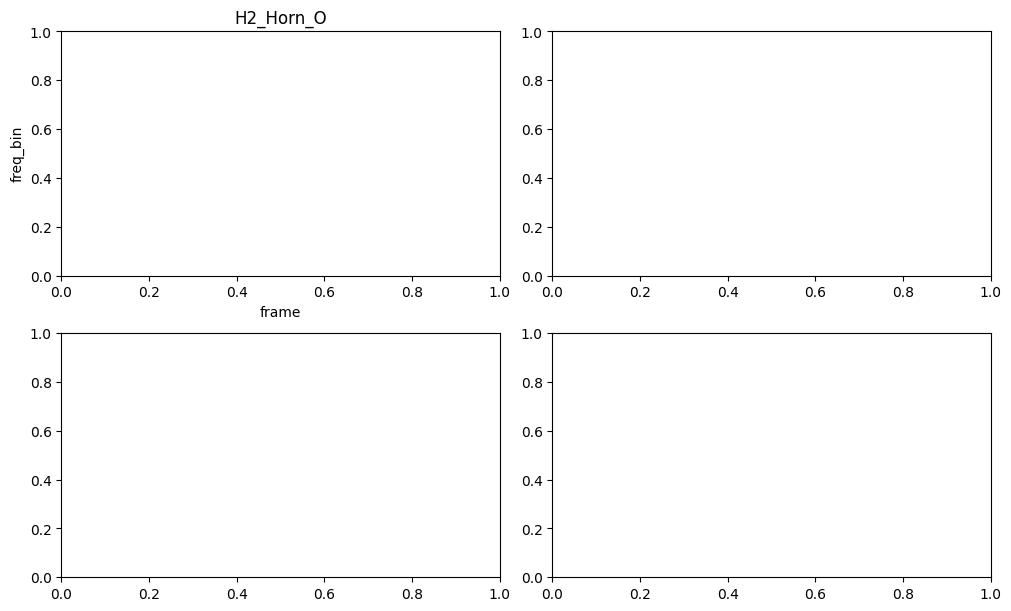

In [16]:
plotmanager.drawPlot(plot_list)

In [ ]:
plotmanager = PlotManager(row=2, col=2, type='rawaudio')

In [ ]:
plot_rawaudio_list = [
    {"content": raw_1, "position": [0,0], "title":"H2_Horn_O"},
    {"content": raw_2, "position": [0,1], "title":"H2_Horn_X"},
    {"content": raw_3, "position": [1,0], "title":"NewGen_Horn_O"},
    {"content": raw_4, "position": [1,1], "title":"NewGen_Horn_X"},
]

<Figure size 640x480 with 0 Axes>

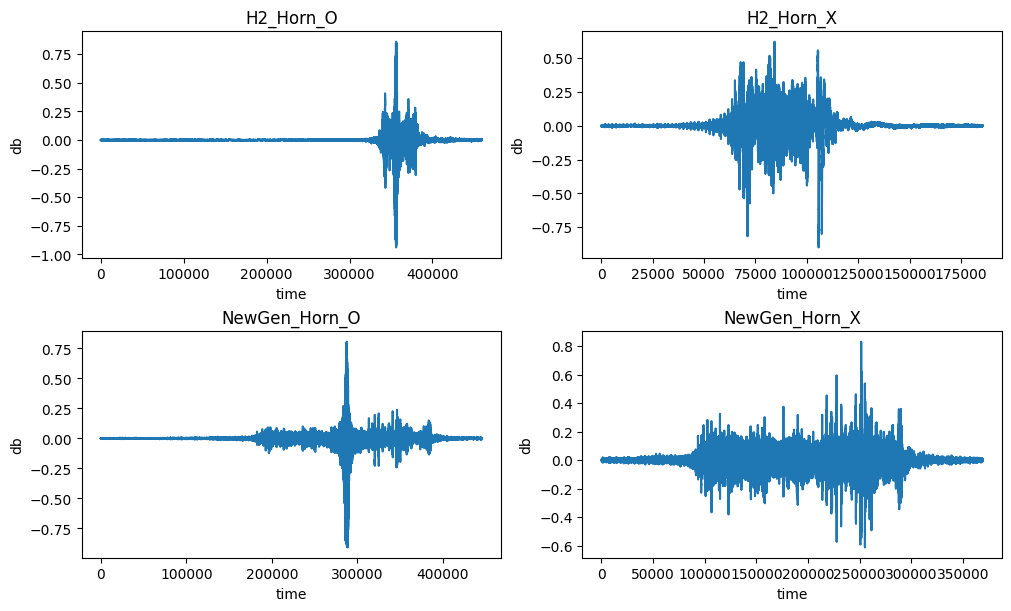

In [ ]:
plotmanager.drawPlot(plot_rawaudio_list)

# Sound Part Check

In [ ]:
file_list = glob.glob(prefix+'/ai_data/샘플데이터-new/Horn_O/221102_수소열차/S206/Spilt_wav_2sec/*.wav')
file_list = sort_filenames_by_number(file_list)
file_list = np.array(file_list)
file_list = file_list.reshape(4,4)

In [ ]:
print(file_list)

[['/content/drive/MyDrive/Artificial_Intelligence/ai_data/샘플데이터-new/Horn_O/221102_수소열차/S206/Spilt_wav_2sec/Test_10_[0.0s-28.7s]_out_1.wav'
  '/content/drive/MyDrive/Artificial_Intelligence/ai_data/샘플데이터-new/Horn_O/221102_수소열차/S206/Spilt_wav_2sec/Test_10_[0.0s-28.7s]_out_2.wav'
  '/content/drive/MyDrive/Artificial_Intelligence/ai_data/샘플데이터-new/Horn_O/221102_수소열차/S206/Spilt_wav_2sec/Test_10_[0.0s-28.7s]_out_3.wav'
  '/content/drive/MyDrive/Artificial_Intelligence/ai_data/샘플데이터-new/Horn_O/221102_수소열차/S206/Spilt_wav_2sec/Test_10_[0.0s-28.7s]_out_4.wav']
 ['/content/drive/MyDrive/Artificial_Intelligence/ai_data/샘플데이터-new/Horn_O/221102_수소열차/S206/Spilt_wav_2sec/Test_10_[0.0s-28.7s]_out_5.wav'
  '/content/drive/MyDrive/Artificial_Intelligence/ai_data/샘플데이터-new/Horn_O/221102_수소열차/S206/Spilt_wav_2sec/Test_10_[0.0s-28.7s]_out_6.wav'
  '/content/drive/MyDrive/Artificial_Intelligence/ai_data/샘플데이터-new/Horn_O/221102_수소

In [ ]:
count = 0
part_plot_list = []

for i in range(len(file_list)):
    for j in range(len(file_list[0])):
        count = count + 1
        _, part_feature = SoundClass.getSound(file_list[i][j])
        if part_feature is None:
            continue
        part_plot_list.append( {"content": part_feature, "position": [i, j], "title":"part_"+str(count)} )

cannot reshape tensor of 0 elements into shape [-1, 0] because the unspecified dimension size -1 can be any value and is ambiguous


<Figure size 640x480 with 0 Axes>

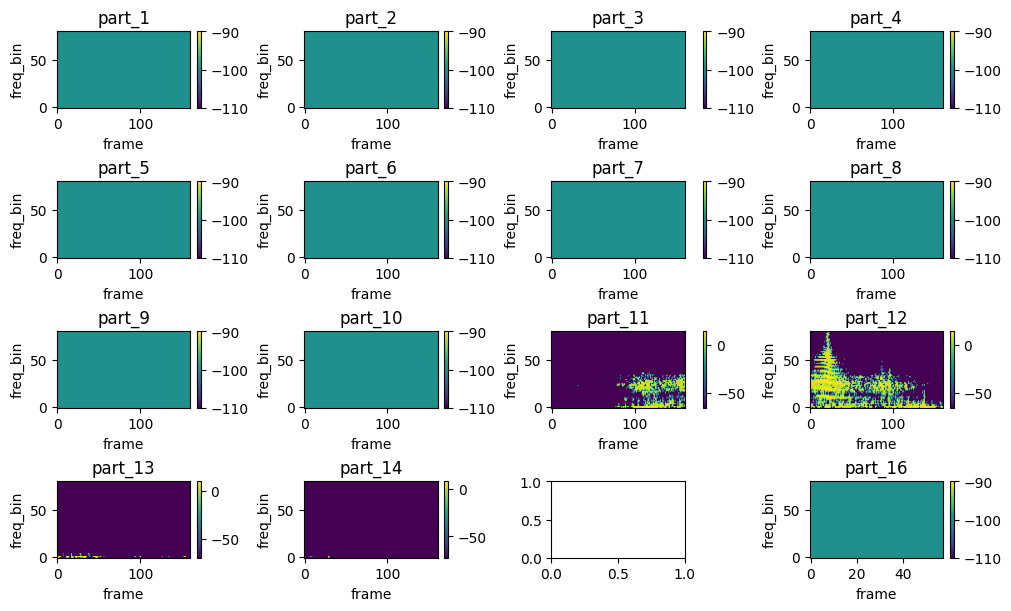

In [ ]:
plotmanager = PlotManager(row=4, col=4)
plotmanager.drawPlot(part_plot_list)